# Actividades de clase, semanas 4, 5 y 6 [Segunda parte]

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

In [1]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Módulo III (cont.)

## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

In [2]:
#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">


## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff39d02cf98>,
 Text(0.5, 1.0, 'REPLICATE'))

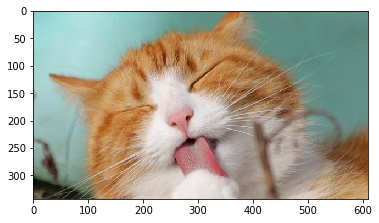

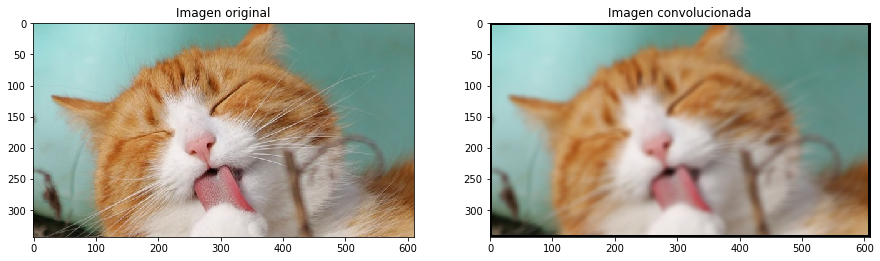

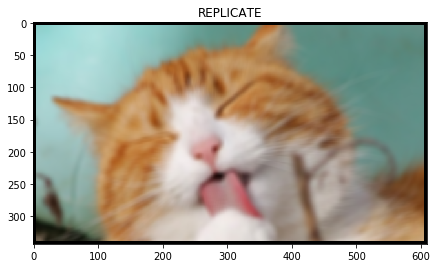

In [5]:

#Leer la imagen
img = cv2.imread('res/gato.jpg', cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#Tamaño del kernel
k_size = 9
#Obtener un kernel que se ajusta al tamaño solicitado mediante la función
(r, kernel) = make_kernel(k_size)
#Crear la matriz de ceros del tamaño de la imagen de entrada, tipo de datos flotante
res = np.zeros(img_rgb.shape, dtype=np.float64)

#Realizar la operación convolución sobre toda la imagen de entrada
for i in range(r,img_rgb.shape[0]-r):
    for j in range(r, img_rgb.shape[1]-r):
        apply_kernel(img_rgb, res, i, j, kernel, r)

#Asegurar el tipo de dato uint8
res=res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original y la convolución
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))


arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img_rgb, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

b_sz = 0

#Aplicar MakeBorder bajo todas las alternativas (último parámetro)
replicate = cv2.copyMakeBorder(res,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REPLICATE)

fig = plt.figure(figsize=(24,12))
plt.subplot(231),plt.imshow(replicate,'gray'),plt.title('REPLICATE')

In [ ]:
# La funcion make_kernel crea una mascara de convolucion de un tamaño especifico, mientras que la funcion apply_kernel, lo que
# hace es ejecutar esta mascara sobre la imgane original, obtendiendo la imgagen distorcionada de la derecha con los bordes
# marcados de color negro, estos bordes son negros ya que al momento de realizar la convolucion las vecindades de los pixeles 
# centrales toman el valor de 0 

In [ ]:
# se nota que con el filtro cv2.filter2d, la imagen se amplia en el eje x, y ademas se tiene mas control sobre el tamañano 
# de los bordes con un simple comando (b_sz = #). Se puede notar que ente filtro se ejecuta mas rapido que la mascara utilizada
# anteriormente

In [6]:
### Implementación de la librería time
import time

t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar
print (time.clock()-t0,"seconds")

5.5000000003246896e-05 seconds


## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

In [3]:
#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

In [ ]:
# SOL:

/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


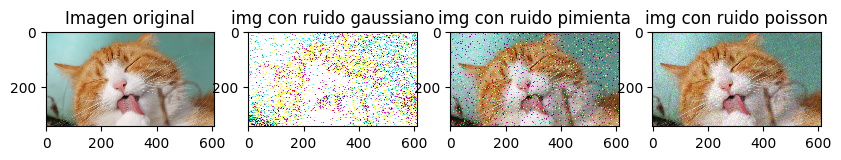

In [4]:
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
gaussian_noise_img = gaussian_noise(img,100)
sp_noise_img = sp_noise(img,0.5,0.05)
poisson_noise_img = poisson_noise(img)
fig, arreglo_plots = plt.subplots(1,4, figsize=(10, 15), dpi = 100)
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[1].set_title('img con ruido gaussiano')
arreglo_plots[1].imshow(gaussian_noise_img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[2].set_title('img con ruido pimienta')
arreglo_plots[2].imshow(sp_noise_img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[3].set_title('img con ruido poisson')
arreglo_plots[3].imshow(poisson_noise_img, cmap="gray", vmin=0, vmax=255)

In [ ]:
# la imagen con ruido gaussiano no corresponde a la salida deseada segun el resutlado esperado, pero parece estar correcto 
# utilizando  una desviacion de 50 y otra de 100 

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

###  Implementación del filtro:

In [77]:
####Implementación 100 veces filtro####
#tamaño del kernel
# k_size = 3
#crear el kernel
# kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
#crear imagen que se va a modificar las n veces que se aplique el filtro
res = img.copy()
#ciclo que implementa el filtro de media
def applyFilter(k_size,res,times):
    kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
    for i in range(0,times):
        res = cv2.filter2D(res2, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    return res    
res2 = applyFilter(3,res,100)
res3 = applyFilter(11,res,100)


In [78]:
# SOL:

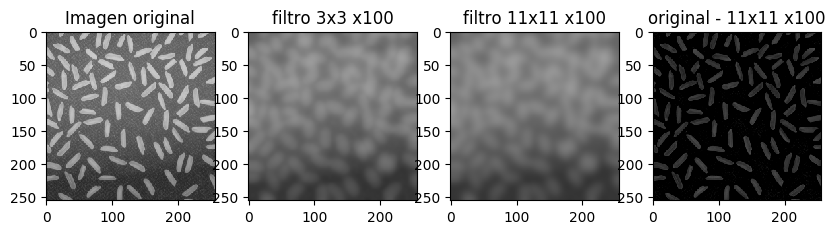

In [88]:
img = cv2.cvtColor(cv2.imread('res/rice.png'), cv2.COLOR_BGR2RGB)
fig, arreglo_plots = plt.subplots(1,4, figsize=(10, 15), dpi = 100)

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[1].set_title('filtro 3x3 x100')
arreglo_plots[1].imshow(res2, cmap="gray", vmin=0, vmax=255)
arreglo_plots[2].set_title('filtro 11x11 x100')
arreglo_plots[2].imshow(res3, cmap="gray", vmin=0, vmax=255)

img_subtract = np.zeros(img.shape, np.uint8)
img_subtract[:,:,0] = cv2.subtract(img[:,:,0], res3[:,:,0])
img_subtract[:,:,1] = cv2.subtract(img[:,:,1], res3[:,:,1])
img_subtract[:,:,2] = cv2.subtract(img[:,:,2], res3[:,:,2])

arreglo_plots[3].set_title('original - 11x11 x100')
arreglo_plots[3].imshow(img_subtract, cmap="gray", vmin=0, vmax=255)



¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

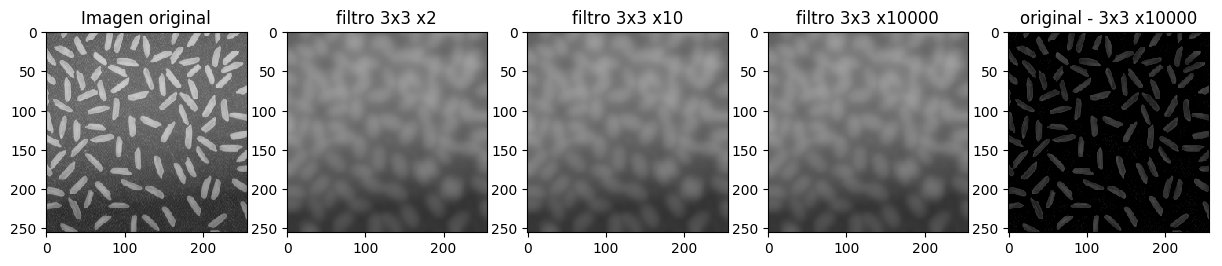

In [92]:
res4 = applyFilter(3,res,2)
res5 = applyFilter(3,res,10)
res6 = applyFilter(3,res,10000)
fig, arreglo_plots2 = plt.subplots(1,5, figsize=(15, 15), dpi = 100)
arreglo_plots2[0].set_title('Imagen original')
arreglo_plots2[0].imshow(img, cmap="gray", vmin=0, vmax=255)
arreglo_plots2[1].set_title('filtro 3x3 x2')
arreglo_plots2[1].imshow(res4, cmap="gray", vmin=0, vmax=255)
arreglo_plots2[2].set_title('filtro 3x3 x10')
arreglo_plots2[2].imshow(res5, cmap="gray", vmin=0, vmax=255)
arreglo_plots2[3].set_title('filtro 3x3 x10000')
arreglo_plots2[3].imshow(res6, cmap="gray", vmin=0, vmax=255)

img_subtract = np.zeros(img.shape, np.uint8)
img_subtract[:,:,0] = cv2.subtract(img[:,:,0], res6[:,:,0])
img_subtract[:,:,1] = cv2.subtract(img[:,:,1], res6[:,:,1])
img_subtract[:,:,2] = cv2.subtract(img[:,:,2], res6[:,:,2])

arreglo_plots2[4].set_title('original - 3x3 x10000')
arreglo_plots2[4].imshow(img_subtract, cmap="gray", vmin=0, vmax=255)

In [ ]:
# el filtro 3x3 visualemente cambia muy poco  aunque se aplique un numero grande de veces (10000) 

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


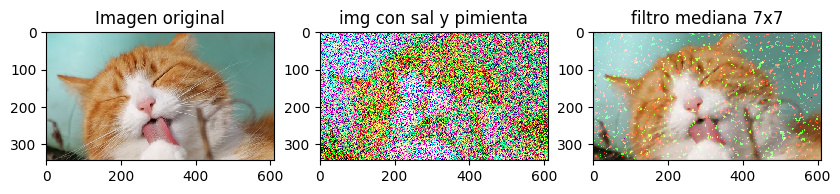

In [96]:
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
sp_noise_img = sp_noise(img,0.7,0.7)
fig, arreglo_plots = plt.subplots(1,3, figsize=(10, 15), dpi = 100)
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[1].set_title('img con sal y pimienta')
arreglo_plots[1].imshow(sp_noise_img, cmap="gray", vmin=0, vmax=255)

median = cv2.medianBlur(sp_noise_img,7)

arreglo_plots[2].set_title('filtro mediana 7x7')
arreglo_plots[2].imshow(median, cmap="gray", vmin=0, vmax=255)

In [ ]:
# vemos que el filtro de mediana remueve gran parte del ruido causado por la transfromacion sp